In [91]:
# INF2178
# Jingwen Ji
# 1006128101

In [92]:
%pip install statsmodels bioinfokit


In [93]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot

In [94]:
# load dataset
data_file_path = "/INF2178_A2_data.xlsx"
df = pd.read_excel(data_file_path)


In [95]:
# Rename the columns
new_col_names = {
    "_id": "ID",
    "LOC_ID": "LOC_ID",
    "LOC_NAME": "LOC_NAME",
    "AUSPICE": "AUSPICE",
    "ADDRESS": "ADDRESS",
    "PCODE": "POSTAL_CODE",
    "ward": "WARD",
    "bldg_type": "BUILDING_TYPE",
    "BLDGNAME": "BUILDING_NAME",
    "IGSPACE": "IG_SPACE",
    "TGSPACE": "TG_SPACE",
    "PGSPACE": "PG_SPACE",
    "KGSPACE": "KG_SPACE",
    "SGSPACE": "SG_SPACE",
    "TOTSPACE": "TOTAL_SPACE",
    "subsidy": "SUBSIDY",
    "cwelcc_flag": "CWELCC_FLAG"
}
df.rename(columns=new_col_names, inplace=True)

# Converting columns to numeric data type
numeric_cols = ["IG_SPACE", "TG_SPACE", "PG_SPACE", "KG_SPACE", "SG_SPACE", "TOTAL_SPACE"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.head()


,ID,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,POSTAL_CODE,WARD,BUILDING_TYPE,BUILDING_NAME,IG_SPACE,TG_SPACE,PG_SPACE,KG_SPACE,SG_SPACE,TOTAL_SPACE,SUBSIDY,CWELCC_FLAG
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [96]:
# Melt the DataFrame
df_melt = pd.melt(df, id_vars=['AUSPICE', 'BUILDING_TYPE'], value_vars=['TOTAL_SPACE'], var_name='SpaceType', value_name='TotalSpace')
df_melt['BUILDING_TYPE'] = df_melt['BUILDING_TYPE'].astype('category')

df_melt.head()



,AUSPICE,BUILDING_TYPE,SpaceType,TotalSpace
0,Non Profit Agency,Public Elementary School,TOTAL_SPACE,164
1,Non Profit Agency,Public Elementary School,TOTAL_SPACE,83
2,Non Profit Agency,Catholic Elementary School,TOTAL_SPACE,102
3,Non Profit Agency,Other,TOTAL_SPACE,65
4,Non Profit Agency,High Rise Apartment,TOTAL_SPACE,26


**Descriptive Analysis**

In [97]:
# The number of rows and columns in the DataFrame
num_rows = df.shape[0]
num_columns = df.shape[1]
num_rows, num_columns


(1063, 17)

In [98]:
# Check for missing values in the Dataframe
missing_values = df.isnull().sum()
missing_values

ID                 0
LOC_ID             0
LOC_NAME           0
AUSPICE            0
ADDRESS            0
POSTAL_CODE        0
WARD               0
BUILDING_TYPE      0
BUILDING_NAME    348
IG_SPACE           0
TG_SPACE           0
PG_SPACE           0
KG_SPACE           0
SG_SPACE           0
TOTAL_SPACE        0
SUBSIDY            0
CWELCC_FLAG        0
dtype: int64

In [99]:
# Descriptive statistics for specified continuous variable columns
continuous_vars = ["IG_SPACE", "TG_SPACE", "PG_SPACE", "KG_SPACE", "SG_SPACE", "TOTAL_SPACE"]
descriptive_stats_continuous_df = df[continuous_vars].describe().transpose()
descriptive_stats_continuous_df



,count,mean,std,min,25%,50%,75%,max
IG_SPACE,1063.0,3.896519,6.091782,0.0,0.0,0.0,10.0,30.0
TG_SPACE,1063.0,11.600188,12.088152,0.0,0.0,10.0,15.0,90.0
PG_SPACE,1063.0,24.258702,18.577416,0.0,16.0,24.0,32.0,144.0
KG_SPACE,1063.0,14.257761,20.493290,0.0,0.0,0.0,26.0,130.0
SG_SPACE,1063.0,21.661336,30.423503,0.0,0.0,0.0,30.0,285.0
TOTAL_SPACE,1063.0,75.674506,47.816518,6.0,43.0,62.0,97.0,402.0


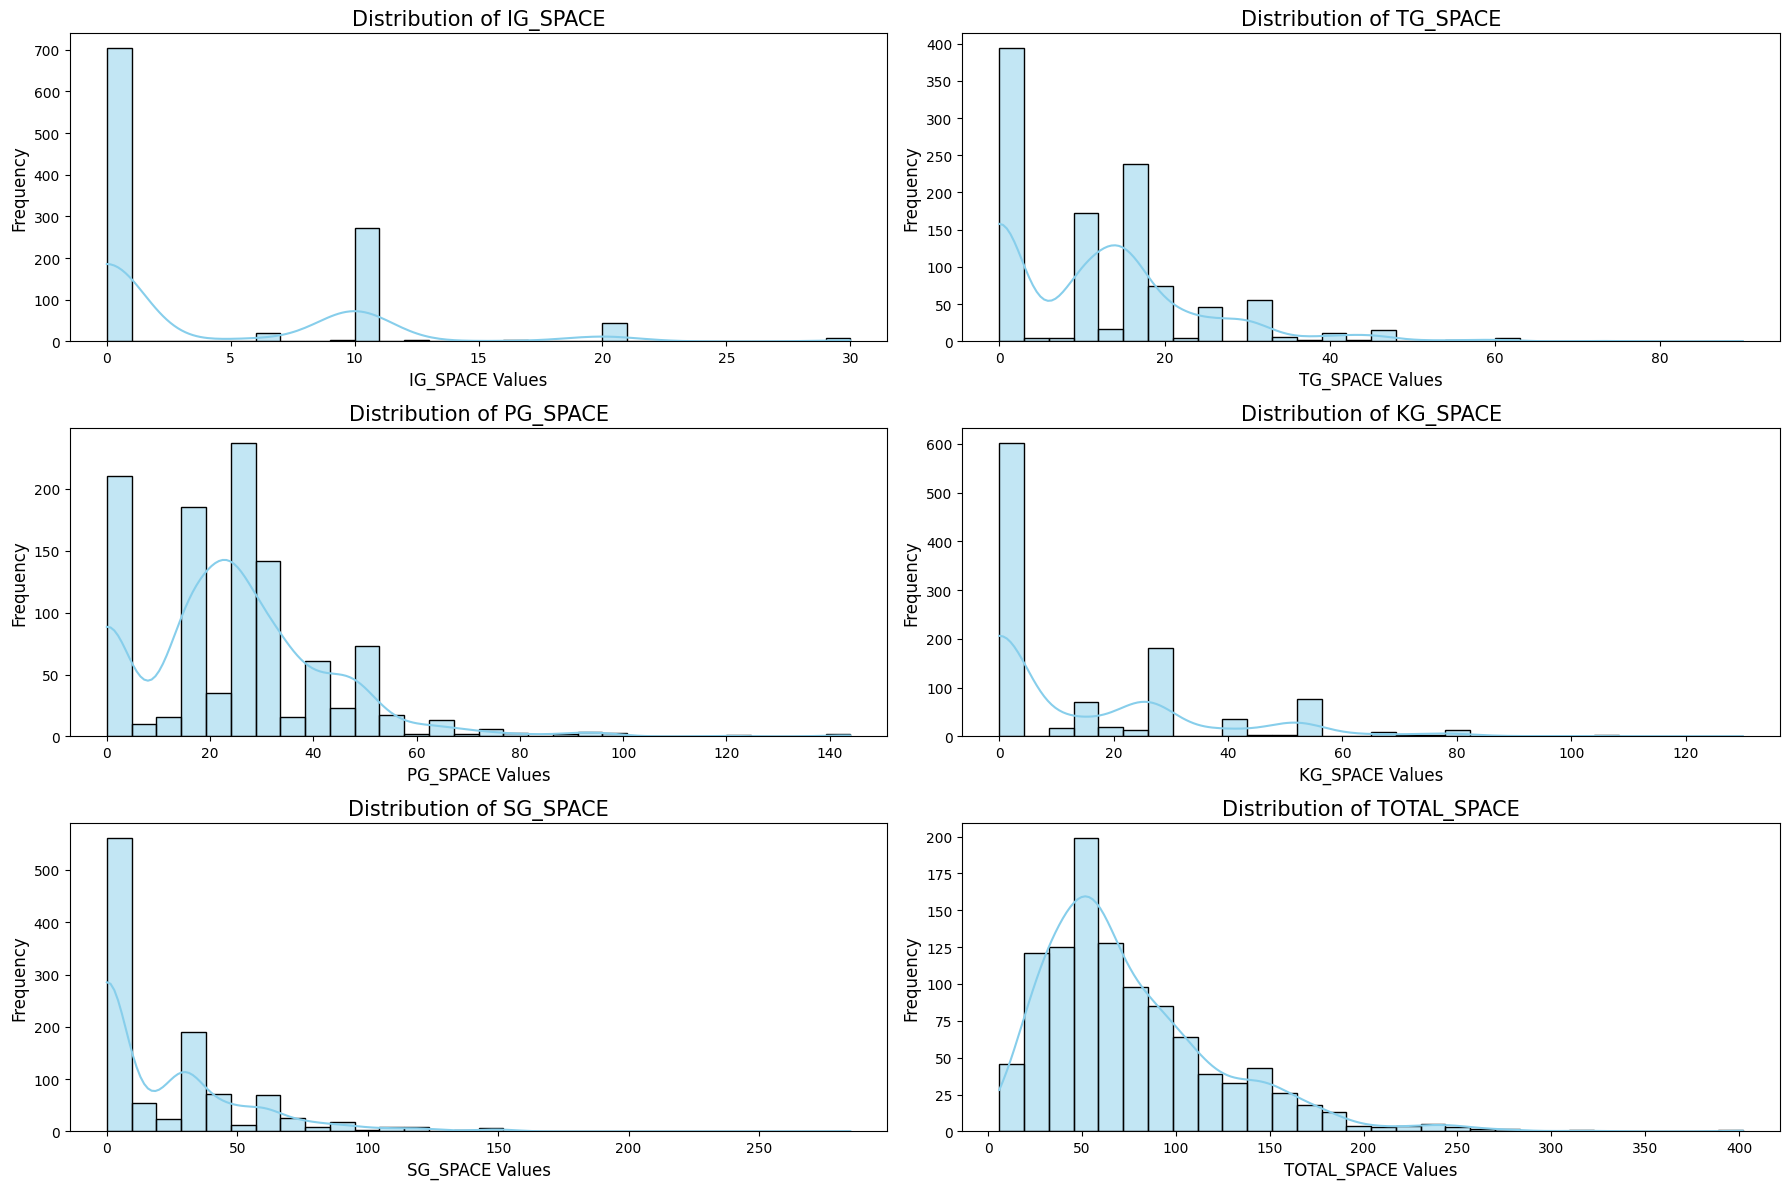

In [100]:
# Draw histograms for each specified continuous variable to check their distribution

plt.figure(figsize=(18, 12))

# Loop through the list of columns and create a histogram for each
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns, ith subplot
    sns.histplot(df[var], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {var}', fontsize=15)
    plt.xlabel(f'{var} Values', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


<ipython-input-101-d6545b3aa6dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AUSPICE', y='TotalSpace', data=df_melt, palette=palette,


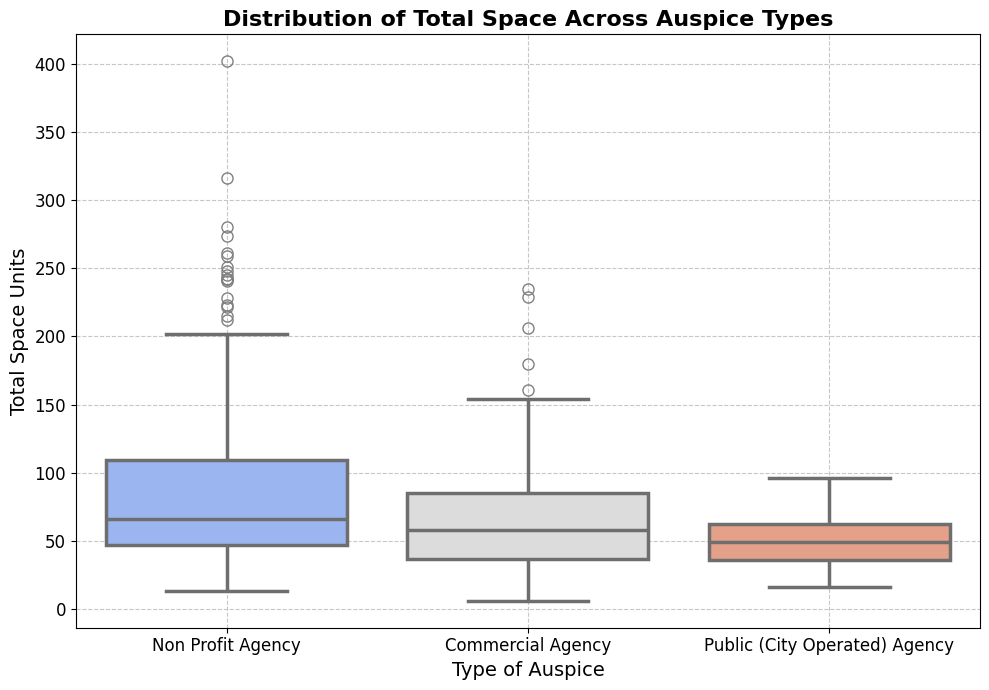

In [101]:

plt.figure(figsize=[10, 7])
palette = "coolwarm"
# Create the boxplot
sns.boxplot(x='AUSPICE', y='TotalSpace', data=df_melt, palette=palette,
            linewidth=2.5, flierprops={'marker':'o', 'markersize':8, 'markeredgecolor':'gray'})

plt.title('Distribution of Total Space Across Auspice Types', fontsize=16, fontweight='bold')
plt.ylabel('Total Space Units', fontsize=14)
plt.xlabel('Type of Auspice', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**One Way ANOVA**

In [50]:
# Perform One-way ANOVA via smstats
model = ols('TotalSpace ~ C(AUSPICE)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table


,sum_sq,df,F,PR(>F)
Intercept,1.355575e+06,1.0,616.153246,1.354042e-107
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [46]:
# Perform One-Way ANOVA via bioinforkit
res = stat()
res.anova_stat(df=df, res_var='TOTAL_SPACE', anova_model='TOTAL_SPACE ~ C(AUSPICE)')
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [30]:
# Perform Tukey's HSD post hoc test
res = stat()
res.tukey_hsd(df=df_melt, res_var='TotalSpace', xfac_var='AUSPICE', anova_model='TotalSpace ~ C(AUSPICE)')
tukey_summary = res.tukey_summary
tukey_summary


/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


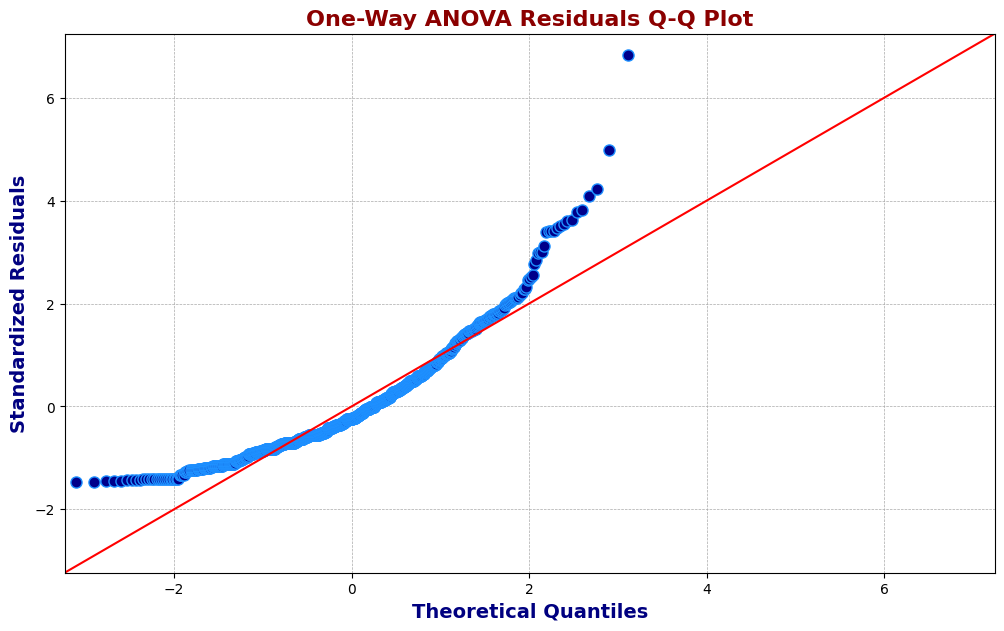

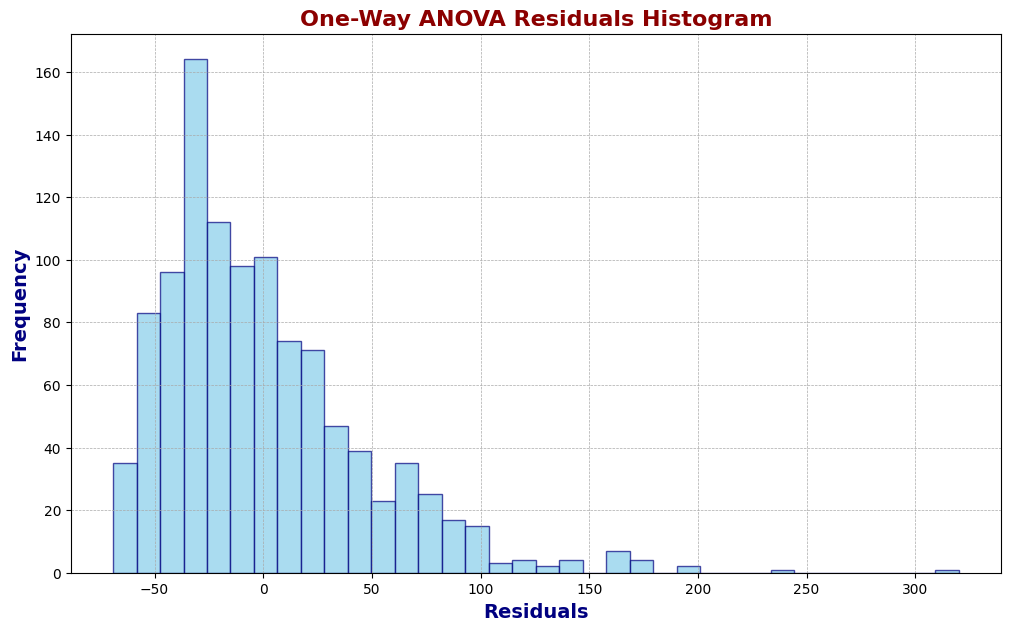

In [40]:
# Extract residuals from fitted ANOVA model
residuals = model.resid

# Q-Q Plot of Residuals
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111)
sm.qqplot(residuals, line="45", fit=True, ax=ax, markerfacecolor='darkblue', markeredgecolor='dodgerblue')
plt.xlabel("Theoretical Quantiles", fontsize=14, fontweight='bold', color='navy')
plt.ylabel("Standardized Residuals", fontsize=14, fontweight='bold', color='navy')
plt.title("One-Way ANOVA Residuals Q-Q Plot", fontsize=16, fontweight='bold', color='darkred')
plt.grid(True, which="both", linestyle="--", linewidth=0.5, color="darkgray")
for line in ax.get_lines():
    line.set_markersize(8)

plt.show()

# Histogram of Residuals
plt.figure(figsize=(12, 7))
plt.hist(residuals, bins="auto", histtype="bar", edgecolor="navy", color="skyblue", alpha=0.7)
plt.xlabel("Residuals", fontsize=14, fontweight='bold', color='navy')
plt.ylabel("Frequency", fontsize=14, fontweight='bold', color='navy')
plt.title("One-Way ANOVA Residuals Histogram", fontsize=16, fontweight='bold', color='darkred')
plt.grid(True, which="both", linestyle="--", linewidth=0.5, color="darkgray")
plt.show()




In [36]:
# Assumption check 1: Perform Shapiro-Wilk test to assess normality
w, pvalue = stats.shapiro(model.resid)
print(f"Shapiro-Wilk Test Statistic: {w:.4f}, P-value: {pvalue:.4g}")


Shapiro-Wilk Test Statistic: 0.9018, P-value: 1.496e-25


In [41]:
# Assumption check 2: Perform Levene's test to assess homogeneity of variances
res = stat()
res.levene(df=df_melt, res_var='TotalSpace', xfac_var='AUSPICE')
levene_summary = res.levene_summary
levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


**Two Way ANOVA**

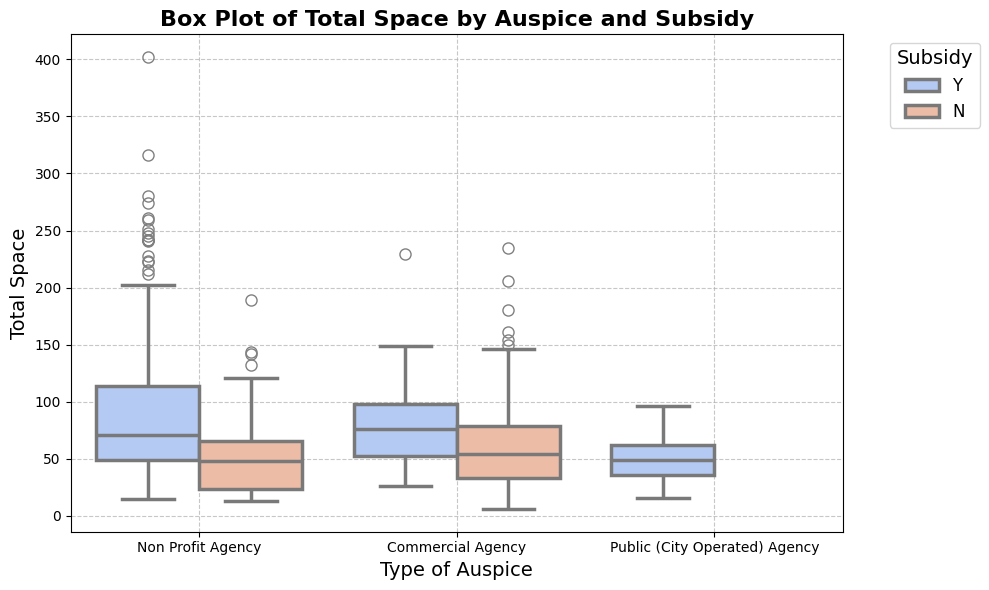

In [65]:
plt.figure(figsize=(10, 6))

# Create the boxplot
ax = sns.boxplot(x="AUSPICE", y="TOTAL_SPACE", hue="SUBSIDY", data=df, palette=palette,
            linewidth=2.5, flierprops={'marker':'o', 'markersize':8, 'markeredgecolor':'gray'})

plt.title("Box Plot of Total Space by Auspice and Subsidy", fontsize=16, fontweight='bold')
ax.set_xlabel("Type of Auspice", fontsize=14)
ax.set_ylabel("Total Space", fontsize=14)
ax.tick_params(axis='x')
ax.legend(title='Subsidy', title_fontsize=14, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [68]:
# Perform two-way ANOVA model
model=ols('TOTAL_SPACE ~ C(AUSPICE) + C(SUBSIDY) + C(AUSPICE):C(SUBSIDY)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.567996e+03,2.0,2.057586,1.282730e-01
C(SUBSIDY),8.352744e+04,1.0,40.117876,3.529094e-10
C(AUSPICE):C(SUBSIDY),5.603445e+04,2.0,13.456555,1.694282e-06
Residual,2.202809e+06,1058.0,NaN,NaN


In [69]:
# Assumption check 1: Perform Shapiro-Wilk test to assess normality
w, pvalue = stats.shapiro(model.resid)
print(f"Shapiro-Wilk Test Statistic: {w:.4f}, P-value: {pvalue:.4g}")


Shapiro-Wilk Test Statistic: 0.9019, P-value: 1.531e-25


In [73]:
# Assumption check 2: Perform Levene's test to assess homogeneity of variances
from scipy.stats import levene

# Get unique values for 'subsidy' and 'AUSPICE'
auspice_categories = df['AUSPICE'].unique()
subsidy_categories = df['SUBSIDY'].unique()

# Extract 'TOTAL_SPACE' values for each 'subsidy' and 'AUSPICE' combination
grouped_data = [df[(df['SUBSIDY'] == sub) & (df['AUSPICE'] == aus)]['TOTAL_SPACE']
                for sub in subsidy_categories for aus in auspice_categories]

# Filter out empty groups
clean_grouped_data = [group for group in grouped_data if not group.empty]

# Perform Levene's test
levene_result = levene(*clean_grouped_data)
print(f"\nLevene's Test for Homogeneity of Variances: Test Statistic = {levene_result.statistic:.4f}, p-value = {levene_result.pvalue:.4g}")



Levene's Test for Homogeneity of Variances: Test Statistic = 12.9847, p-value = 2.515e-10


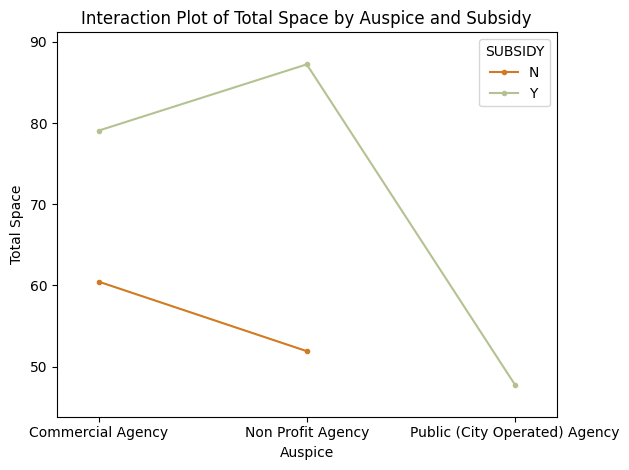

In [79]:
# Create the interaction plot
fig, ax = plt.subplots()
interaction_plot(x=df['AUSPICE'], trace=df['SUBSIDY'], response=df['TOTAL_SPACE'], colors=["#d17a22","#b4c292"], ax=ax)

plt.title('Interaction Plot of Total Space by Auspice and Subsidy')
ax.set_xlabel("Auspice")
ax.set_ylabel("Total Space")
plt.tight_layout()
plt.show()

In [87]:
# Perform the Tukey HSD post-hoc test for with or without subsidy
tukey_subsidy = pairwise_tukeyhsd(endog=df['TOTAL_SPACE'], groups=df['SUBSIDY'], alpha=0.05)
tukey_subsidy.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
N,Y,26.2658,0.0,20.3236,32.208,True


In [90]:
# Perform the Tukey HSD post-hoc test for interaction effect

# Create a single group identifier combining 'AUSPICE' and 'subsidy'
df['group'] = df['AUSPICE'].astype(str) + "," + df['SUBSIDY'].astype(str)

# Perform Tukey's HSD test using the group identifier
tukey_interaction = pairwise_tukeyhsd(endog=df['TOTAL_SPACE'], groups=df['group'], alpha=0.05)
tukey_interaction.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
"Commercial Agency,N","Commercial Agency,Y",18.5991,0.0153,2.3733,34.8249,True
"Commercial Agency,N","Non Profit Agency,N",-8.5631,0.5037,-23.273,6.1469,False
"Commercial Agency,N","Non Profit Agency,Y",26.7646,0.0,17.2862,36.243,True
"Commercial Agency,N","Public (City Operated) Agency,Y",-12.6958,0.4893,-34.2034,8.8119,False
"Commercial Agency,Y","Non Profit Agency,N",-27.1621,0.0008,-45.9161,-8.4082,True
"Commercial Agency,Y","Non Profit Agency,Y",8.1655,0.5712,-6.8401,23.1711,False
"Commercial Agency,Y","Public (City Operated) Agency,Y",-31.2949,0.0045,-55.747,-6.8427,True
"Non Profit Agency,N","Non Profit Agency,Y",35.3277,0.0,21.9757,48.6796,True
"Non Profit Agency,N","Public (City Operated) Agency,Y",-4.1327,0.9891,-27.6064,19.3409,False
"Non Profit Agency,Y","Public (City Operated) Agency,Y",-39.4604,0.0,-60.0631,-18.8577,True
